# Online shoppers intention - Exploratory Data Analysis (EDA)
- Find errors 
- Find relationships that will dictate the way we pre-process our data

## Table of contents <a name="tablecontents"></a>
1. [Data Overview](#overview)
2. [Simple Encoding](#p1)
3. [Count Plots of Categorical Variables](#p2)
4. [Distribution of Continous Varibles](#p3)
5. [Distribution of Continous Where Revenue is 1 ](#p4)
6. [Scatterplots](#p5)
7. [Box-plots](#p6)
8. [Outlier Significance - IQR](#p7)
9. [Data Assumptions](#p8)
10. [Correlation Continous (Spearman)](#p9)
11. [Correlation Categorical (Chi-square)](#p10)
12. [Clustering](#p11)
13. [Summary](#p12)

In [9]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# setting to display max columns
pd.set_option('display.max_columns', 500)

# 1. Data Overview <a name="overview"></a>
Back to [Table of Contents](#tablecontents)

In [10]:
# Loaded in the data
data = pd.read_csv('online_shoppers_intention.csv')
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


- Month and VisitorType need to be encoded and converted to numeric

In [11]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

- we have 12,330 rows and 18 columns

In [12]:
data.shape

(12330, 18)

- we have no missing values  

In [13]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- Informational page is only visited frequently and for longer periods of time (values only in top quantile for page visits and duration)
- ProductRelated page and duration has more "wholesome" distribution (visited 'few' and many times, for little and long time) 
- Administrative page and duration are in between, only has values starting in the 2nd quantile up 
- Duration and pages has definete outliers. It will be tricky dealing with them as they include many 0 values 
    - e.g. using IQR all informational duration values would become zeros as it would consider other values as outliers
    - Similar for bounce rates, exit rates, special day 
- Month of May, returning visitor, during the week, and not purhcasing (Revenue false) seem to be most frequent values 

In [7]:
# Looking at the descriptive statisticss for each column
# verifies no missing values with count 
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


- we notice that we are missing 2 months: January and April
- cannot do much about that 

In [8]:
print('Nbr of months: ',len(data.Month.value_counts()))
data.Month.value_counts()

Nbr of months:  10


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

We intend to encode months into quarters. 

### Simple Encoding <a name="p1"></a>
- Encode month and visitor type into integers <br> 
Back to [Table of Contents](#tablecontents)

In [14]:
# this function takes the month object type and converts it to integer respectivelely 
def division_func_month(div) :
    if div == 'Feb':
        return 2
    elif div == 'Mar':
        return 3
    elif div == 'May':
        return 5
    elif div == 'June':
        return 6
    elif div == 'Jul':
        return 7
    elif div == 'Aug':
        return 8
    elif div == 'Sep':
        return 9
    elif div == 'Oct':
        return 10
    elif div == 'Nov':
        return 11
    elif div == 'Dec':
        return 12
    else:
        return 0

In [15]:
# create a new column with same vals as Month 
data['monthBin'] = data['Month']
# apply function
data['monthBin'] = data['monthBin'].apply(division_func_month)

In [16]:
# encoding for revenue and weekend
def div_fun_visType(div) :
    if div == 'Returning_Visitor':
        return 1
    if div == 'New_Visitor':
        return 2
    else:
        return 3

In [17]:
# create a new column with same vals as weekend VisitorType
data['VisitorTypeBin'] = data['VisitorType']
# apply function
data['VisitorTypeBin'] = data['VisitorTypeBin'].apply(div_fun_visType)

In [18]:
data = data.drop(['VisitorType','Month'],axis=1)
data.to_csv('basic_encoding.csv')

## Count Plots of Categorical Variables <a name="p2"></a>
Back to [Table of Contents](#tablecontents)

**Findings:**
- Administrative and Informational page the highest count is 0 
- ProductRelated page has few (1 or 2) extreme values <400 (maybe someone is websrapping the page)
- Special day 0.0 has the most values (a day before and after the special day)
- May and then November most active months 
    - Not many holidays in May except for memorial day, for november it maybe makes sence as its gift/shopping season prep for december
    - Relating this to special day it does not really make sense (What special days were they tracking?) 
- Most users use 2 operating systems (Not sure how they counted this)
- Most users use 2 browsers (Not sure how they tracked this, does not seem right)
- Most users are from region 1 (I don't know what regions are here)
- Traffic type 2 and 1 are the most commont (again I don't know what these numbers mean)
- Most activity during the week
    - Maybe the research is done during the weekend 
- Returning visitors have the highest count (do not know what is hiding in other) 
- **Target Variable (Revenue/Y) is imbalanced**
    - will fix that in the modeling stage

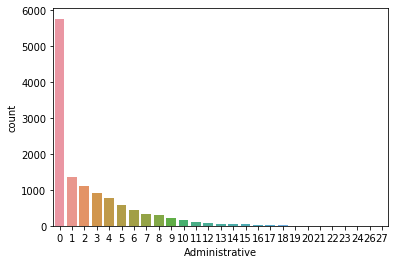

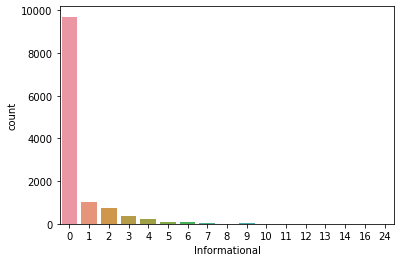

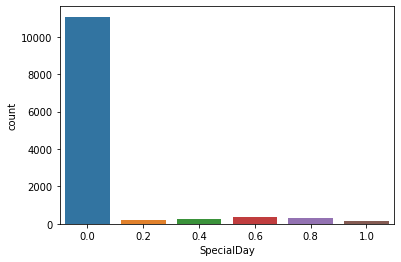

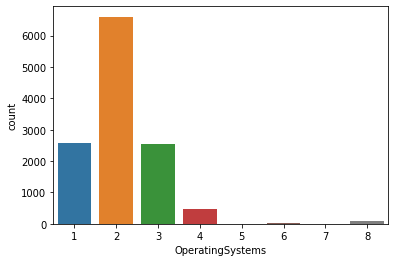

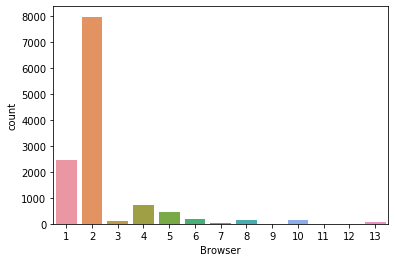

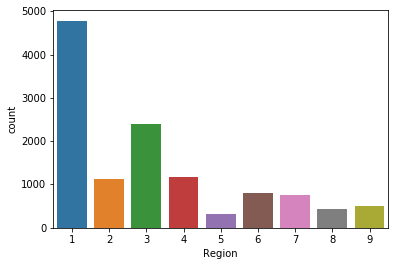

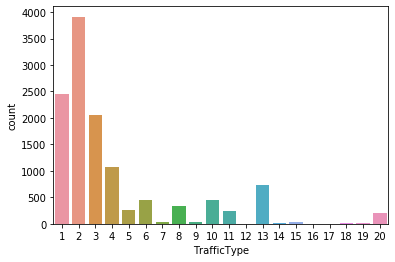

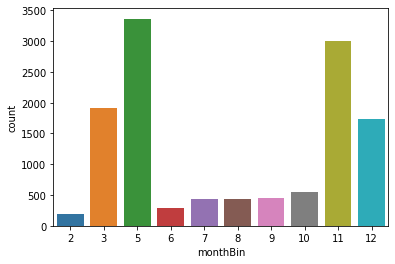

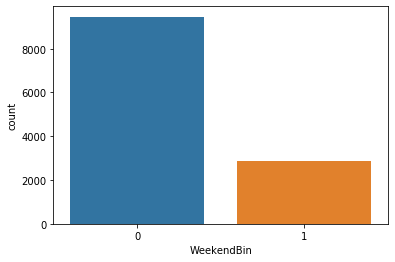

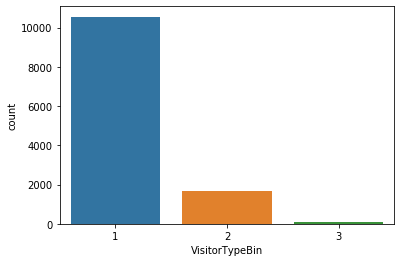

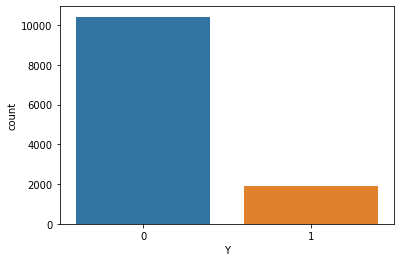

In [17]:
col_names = ['Administrative', 'Informational', 'SpecialDay','OperatingSystems', 'Browser', 'Region',
             'TrafficType','monthBin', 'WeekendBin', 'VisitorTypeBin', 'Y']

df = data[col_names]
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

## Distribution of Continous Varibles <a name="p3"></a>
Back to [Table of Contents](#tablecontents)
- All of them are skewed to the right (Right/positive transformation function)
- We can anticipate outliers to be to the right 
- Most Bounce and Exit Rates between 0 and 0.05 % 
    - Outliers are easier to see here we will check the relationship using a scatterplot
- Most values concentrated near 0 

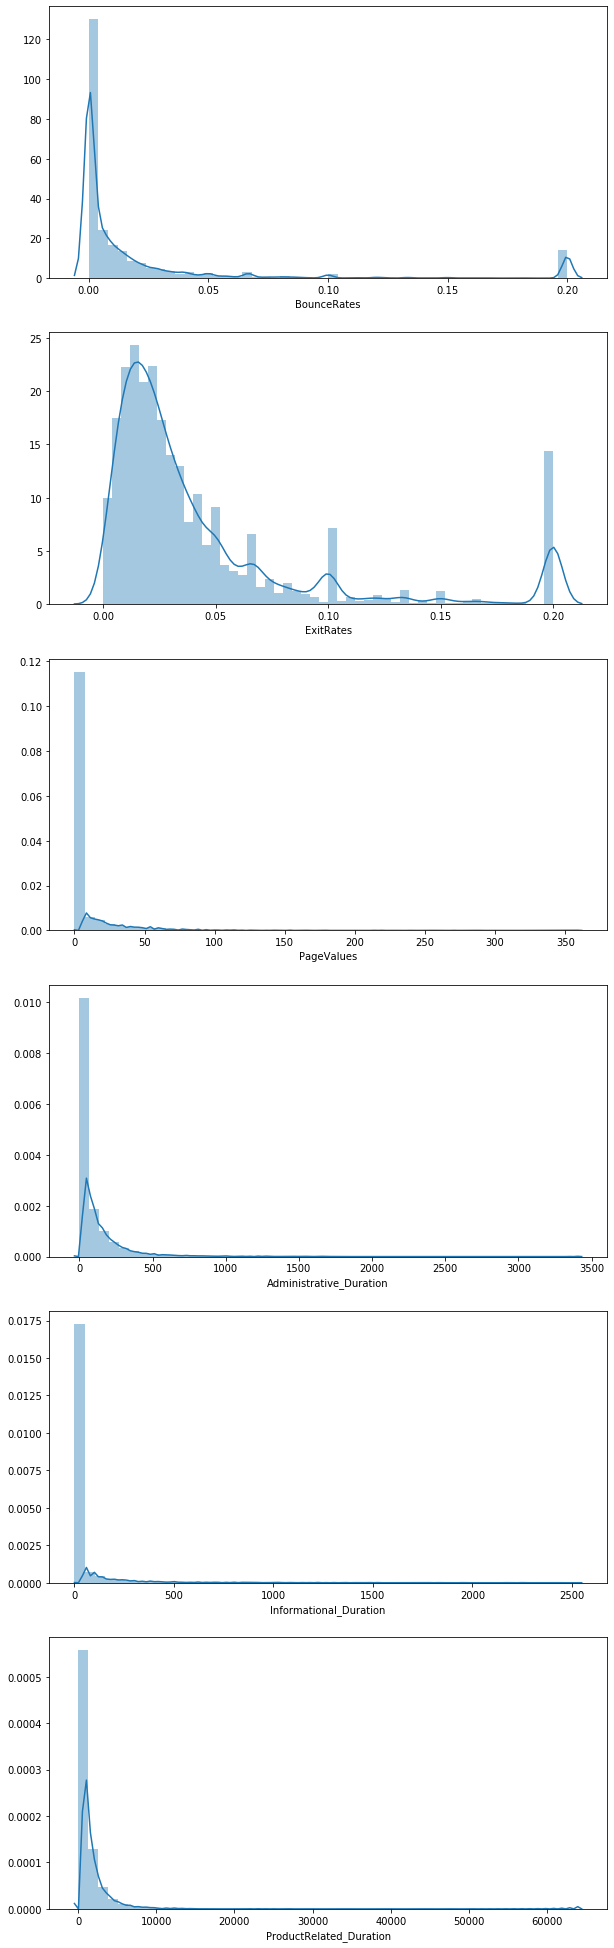

In [19]:
# Plotting a histogram of columns for continous values  
col_names2 = ['BounceRates', 'ExitRates','PageValues', 'Administrative_Duration','Informational_Duration',
              'ProductRelated_Duration'] 

fig, ax = plt.subplots(len(col_names2), figsize=(10,35))

for i, col_val in enumerate(col_names2):

    sns.distplot(data[col_val], hist=True, ax=ax[i])

plt.show()

## Distribution of Continous Where Revenue is 1 <a name="p4"></a>
Back to [Table of Contents](#tablecontents)
- it seems like there is less outliers and distribution slighlty shifted to the right especially for Page Values 
    - makes sense becasue here are users that made the purchase 
- it seems users who make the purchase spend more time before they exit on different pages
- bounce rates seem unchanged 

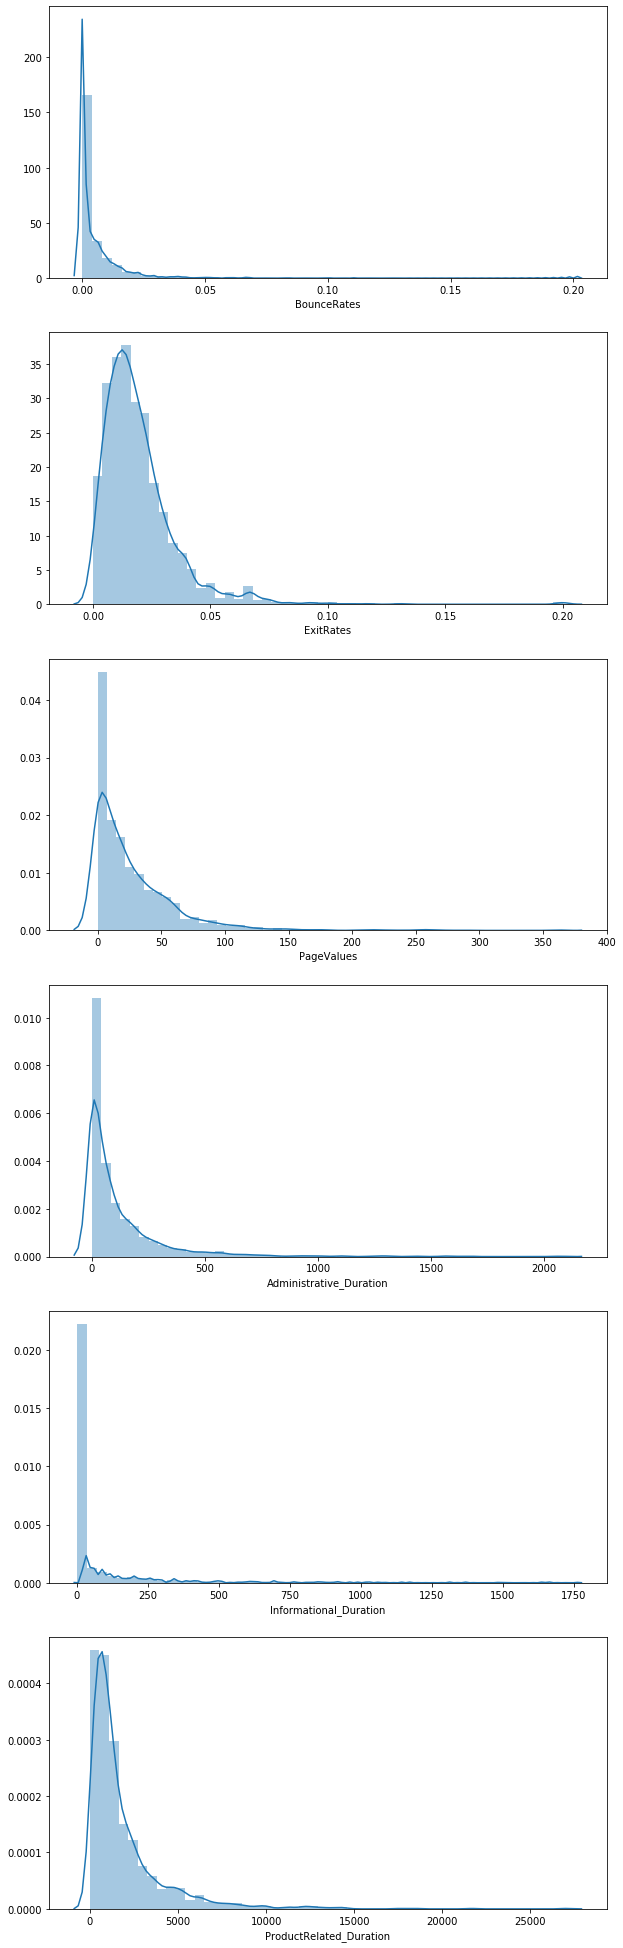

In [20]:
# Plotting a histogram of columns for continous values  
col_names2 = ['BounceRates', 'ExitRates','PageValues', 'Administrative_Duration','Informational_Duration',
              'ProductRelated_Duration'] 

fig, ax = plt.subplots(len(col_names2), figsize=(10,35))

for i, col_val in enumerate(col_names2):

    sns.distplot(rev_true[col_val], hist=True, ax=ax[i]) # change to rev_true

plt.show()

## Scatter Plots <a name="p5"></a>
Here are all the scatter plot combination of our 6 continous variables. <br>

Back to [Table of Contents](#tablecontents)

### Decision
- **No outlier treatment will be made**. We assume outliers are significant for the machine learning model 
- New features will be created if relationship is significant 

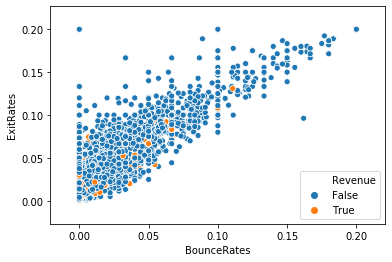

In [17]:
ax = sns.scatterplot(x="BounceRates", y="ExitRates",hue = 'Revenue', data=data)

- We see that there is a good **linear relationship**
- Outliers observations indicate Revenue false
- Revenue True seems more concentrated between 0 - 0.1 
- Revenue false has much more observations 
- Outliers might be important to determine whether the revenue will be false 
- Higher exit and bounce rates might mean a higher probability that the revenue will be false 
- Binning based on a certain thershold of these values might improve the modeling results 
- Less linear (but still correlated) 

### Decision
- Outliers are important therefore we will not remove them
- **Combine the two features** with average and weighted average and observe if they display a better relationship

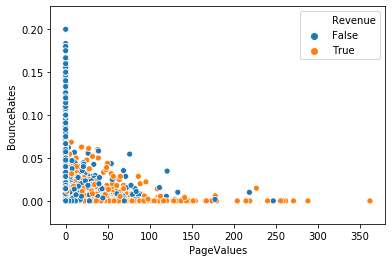

In [14]:
ax = sns.scatterplot(x="PageValues", y="BounceRates",hue = 'Revenue', data=data)

- Good non-linear relationship
- While there a many Page values and Bounce rates observations concentrated in certain area it seems that almost all page values extreme values translate into revenue true and bounce rate extremes into revenue false 
- its like the two extremes have a negative relationship to the target variable 
- If bounce rates 0 - 0.07 and page values (all?) then higher chance the revenue will be true 

**Decision:**
- Outliers are important therefore we will not remove them
-  Create a new feature by dividing the two (then there are no more outliers)

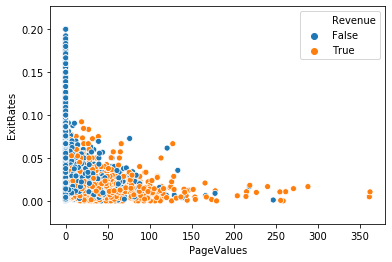

In [15]:
ax = sns.scatterplot(x="PageValues", y="ExitRates",hue = 'Revenue', data=data)

- Same thing happens here but we can see it more clearly 
- it seems if exit rates are between 0 - 0.1 and page values 0 - max there is a higher chance that the revenue will be TRUE
- strong non-linear relationship

**Decision:**
- Outliers are important therefore we will not remove them
-  Create a new feature by dividing the two (then there are no more outliers)

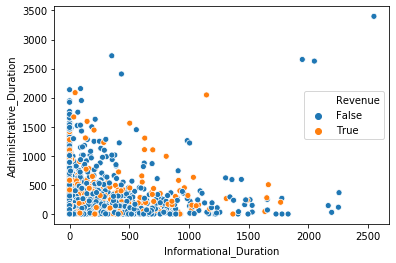

In [18]:
ax = sns.scatterplot(x="Informational_Duration", y="Administrative_Duration",hue = 'Revenue', data=data)

- Here we cannot easily distinguish our target variable between the 2 features 
- We could create a linear combination between the two

**Decision:**
- We decided to leave it alone as we have more significant relationships for other labels 

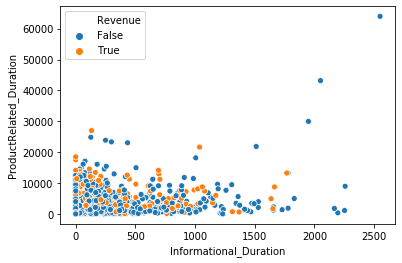

In [19]:
ax = sns.scatterplot(x="Informational_Duration", y="ProductRelated_Duration",hue = 'Revenue', data=data)

- From this picture we cannot say the two have a significant relationship 
- However, it seems revenue false has more extremes

**Decision:**
- We decided to leave it alone as we have more significant relationships for other labels 

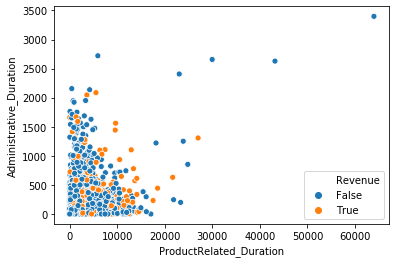

In [20]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="Administrative_Duration",hue = 'Revenue', data=data)

- Values are highly concentrated from administrative duration 0 - 2000 and Product Related duration 0-18,000. 
- More revenue false outliers but not many 
- Product related duration is much larger than any other duration maybe because users spend the most time on it

**Decision:**
- We decided to leave it alone as we have more significant relationships for other labels 

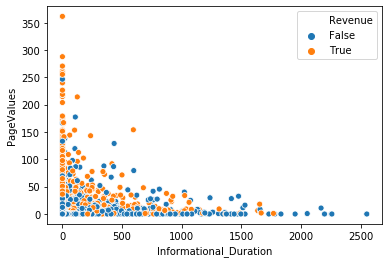

In [21]:
ax = sns.scatterplot(x="Informational_Duration", y="PageValues",hue = 'Revenue', data=data)

- If page values > 1,500 higher chances of revenue being false, and we already know about page values 
- We again see somekind of negative relationship between extremes

**Decision:**
- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

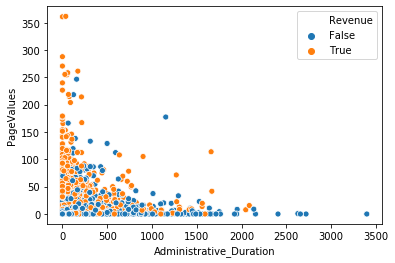

In [24]:
ax = sns.scatterplot(x="Administrative_Duration", y="PageValues",hue = 'Revenue', data=data)

- same thing here 

**Decision:**
- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

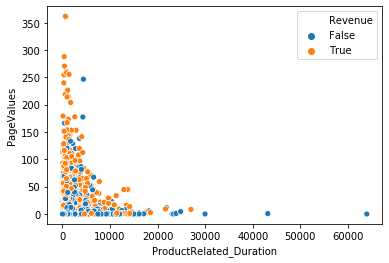

In [31]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="PageValues",hue = 'Revenue', data=data)

- Less appereant relationship 
- Product related duration has 3 big extremes (otherwise not that many)
- Outlier detection might be ok for Product related duration
- Page value outlier point towards Revenue true

**Decision:**
- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

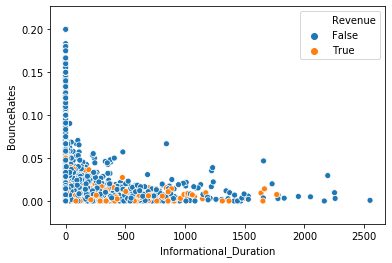

In [22]:
ax = sns.scatterplot(x="Informational_Duration", y="BounceRates",hue = 'Revenue', data=data)

- Revenu true values concentrated not in the extremes but kinda bottom and middle 
- Higher bounce rates clearly most likely mean revenue will be false 

**Decision:**
- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

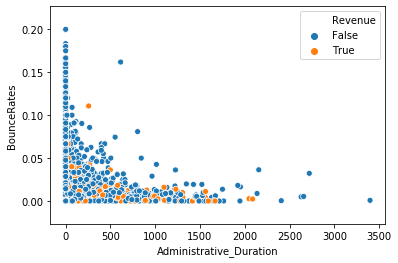

In [26]:
ax = sns.scatterplot(x="Administrative_Duration", y="BounceRates",hue = 'Revenue', data=data)

- Revenue true values concentrated not in the extremes but kinda bottom and middle 
- Revenue false more extremes

**Decision:**
- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

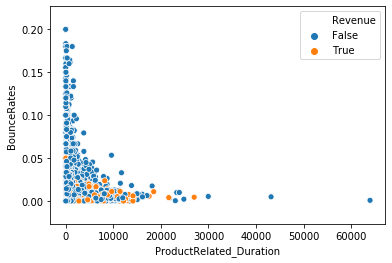

In [27]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="BounceRates",hue = 'Revenue', data=data)

**Decision:**
- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

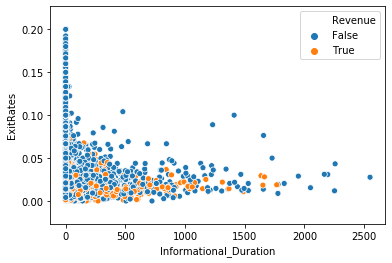

In [23]:
ax = sns.scatterplot(x="Informational_Duration", y="ExitRates",hue = 'Revenue', data=data)

- Exit rates extremes similarly seems more chances of revenue being false

**Decision:**
- Outliers are important therefore we will not remove them
- Slight linear relationship create a new feature by combining 
- Create a new feature by dividing the two (then there are no more outliers)

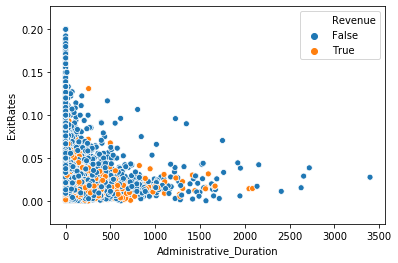

In [28]:
ax = sns.scatterplot(x="Administrative_Duration", y="ExitRates",hue = 'Revenue', data=data)

Both exit and administrative duration being bigger also could mean revenue will most likely be false

**Decision:**
- Outliers are important therefore we will not remove them
- Slight linear relationship create a new feature by combining 
- Create a new feature by dividing the two (then there are no more outliers)

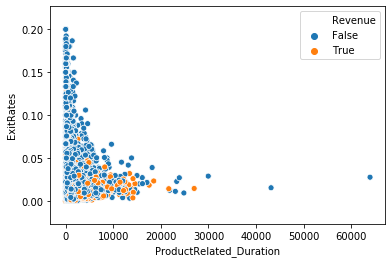

In [29]:
ax = sns.scatterplot(x="ProductRelated_Duration", y="ExitRates",hue = 'Revenue', data=data)

**Decision:**

- Outliers are important therefore we will not remove them
- Create a new feature by dividing the two (then there are no more outliers)

## Box-Plots <a name="p6"></a>

Back to [Table of Contents](#tablecontents)
- We see that there are many outliers for all features 
- Bounce and Exit Rates have a bigger false IQR range with a larger range of outliers
- Page values and Administrative Duration have a bigger true IQR range with a larger range of outliers

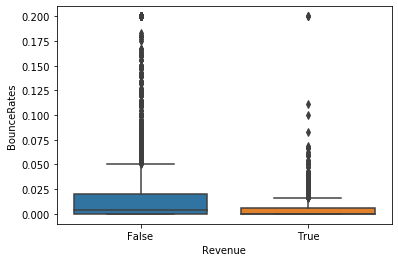

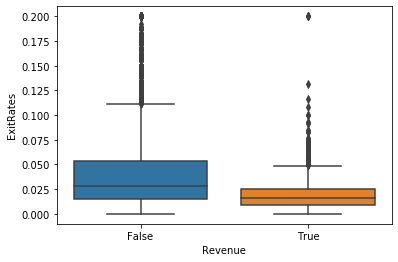

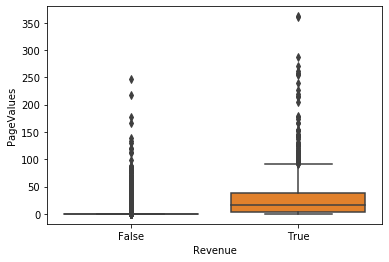

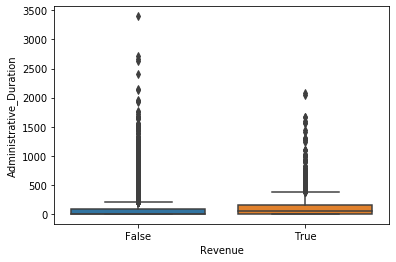

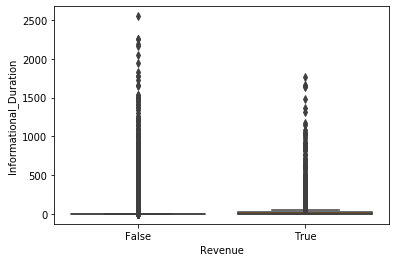

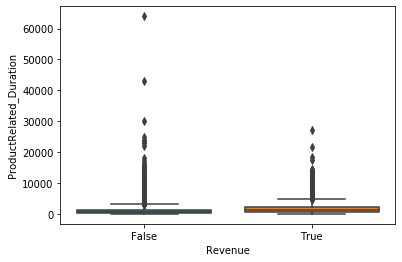

In [49]:
for el in ['BounceRates', 'ExitRates','PageValues', 'Administrative_Duration','Informational_Duration',
              'ProductRelated_Duration']:
    sns.boxplot(x = 'Revenue', y = el,  data = data)
    plt.show()

## Outlier Significance - IQR <a name="p7"></a>

Back to [Table of Contents](#tablecontents)
- We confirm that there are many outliers and by removing or altering them we would introduce significant errors to our data

In [5]:
# select 
outlier = data.select_dtypes(include=['float64'])
outlier = outlier.drop('SpecialDay', axis = 1 )

In [6]:
# Calculate IQR range
def iqr_calc(df):
    Q1 = df.quantile(0.25) # Q1 range
    Q3 = df.quantile(0.75) # Q3 range
    IQR = Q3 - Q1 # IQR range
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

In [7]:
outlier.apply(iqr_calc)

Administrative_Duration    1172
Informational_Duration     2405
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                 2730
dtype: int64

### Data Assumptions: <a name="p8"></a>
Back to [Table of Contents](#tablecontents)

**We assume the following to be the logical data values**
- No NA values allowed
- Administrative, Informational, Product related page and their corresponding duration can be zero (e.g. don't visit and spend time on that page) but cannot be a negative value visit
- Similarly you cannot have negative values for Bounce Rates, Exit rates, Page values, Operating system, Browser, Region
- You cannot have zero values for Exit rates as at some point user will exit
- Browser, region, traffic type and operating system represent segment a user based on their usage and zero category was not mentioned in data description
- Special Day similarly only contains certain values from 0 to 1 in increments of 0.2 (cannot have other values)

**We assume the following to be the correct data types**
- Count: Administrative, Informational, ProductRelated, Browser, OperatingSystem
- Binary: Revenue (Y), Weekend
- Categorical: TrafficType, Region, VisitorType, SpecialDay
- Continous: Administrative_Duration,Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, PageValues 
- Date/time: Month 

**NOTE:** Need to convert counts into ratios 

In [25]:
# a function to check for non-logical data or NA's
def data_validation(row):  
    '''
    Run initially to identify rows which do not logically make sense.
    Fix the issues, and then rerun until only nulls left
    
    '''
    # If any nulls we know it's off
    ret_val = 0
    if row.isna().any():
        ret_val = 1
        
    # cannot be negative
    elif row['Administrative'] < 0:
        ret_val = 2
    elif row['Administrative_Duration'] < 0:
        ret_val = 3
    elif row['Informational'] < 0:
        ret_val = 4
    elif row['Informational_Duration'] < 0:
        ret_val = 5
    elif row['ProductRelated'] < 0:
        ret_val = 6
    elif row['ProductRelated_Duration'] < 0:
        ret_val = 7
    elif row['BounceRates'] < 0:
        ret_val = 8
    elif row['ExitRates'] < 0:
        ret_val = 9
    elif row['PageValues'] < 0:
        ret_val = 10
    elif row['OperatingSystems'] < 0:
        ret_val = 11  
    elif row['Browser'] < 0:
        ret_val = 12
    elif row['Region'] < 0:
        ret_val = 13
        
    # cannot be zero 
    elif row['ExitRates'] == 0:
        ret_val = 14
    elif row['Browser'] == 0:
        ret_val = 15
    elif row['Region'] == 0:
        ret_val = 16
    elif row['OperatingSystems'] == 0:
        ret_val = 17  
    elif row['TrafficType'] == 0:
        ret_val = 18
   
    # Special day can only have the following values
    elif row['SpecialDay'] not in [0.0,0.2,0.4,0.6,0.8,1.0]:
        ret_val = 19
        
    return ret_val

- We have 12,254 logical values
- **76 values in exit rates are 0 which we will have to impute**

In [26]:
# Create a seperate field which indicates that the row, at some point, contained null values which needed to be imputed
data['data_assump'] = data.apply(lambda row: data_validation(row), axis = 1)
data['data_assump'].value_counts()

0     12254
14       76
Name: data_assump, dtype: int64

- We assumed exit rates are not logical as a user needs to leave/log out of a session
- Where Exit Rates are zero so are bounce rates 
- Might be possible a user stays logged in for a some time while this data was collected, however, its unlikely they would stay logged in for 1-year (duration of this data collection)
- There is only 76 values so we doubt the results would be significantly different 

### Decision:
- Create a new feature by imputing exit rates and then compare performance (e.g. median)

In [4]:
# Exit rates are 0 when bounce rates are 0 
data[(data['ExitRates'] == 0) & (data['BounceRates'] == 0) ]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5457,1,63.4,0,0.0,3,120.400000,0.0,0.0,42.293068,0.0,Oct,1,1,3,3,New_Visitor,False,True
5494,0,0.0,0,0.0,24,968.692424,0.0,0.0,106.252517,0.0,Nov,1,1,9,2,Returning_Visitor,False,True
5505,0,0.0,0,0.0,16,519.866667,0.0,0.0,0.000000,0.0,Jul,1,1,1,4,Returning_Visitor,False,False
5533,6,85.2,0,0.0,11,203.000000,0.0,0.0,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,False
5636,0,0.0,0,0.0,13,187.000000,0.0,0.0,0.000000,0.0,Sep,2,5,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,3,94.6,0,0.0,17,265.500000,0.0,0.0,0.000000,0.0,Oct,2,2,1,2,New_Visitor,False,False
7848,1,53.4,0,0.0,3,292.000000,0.0,0.0,0.000000,0.0,Nov,2,2,1,4,Returning_Visitor,False,False
7853,1,51.4,0,0.0,7,562.300000,0.0,0.0,36.657350,0.0,Jul,1,1,6,2,New_Visitor,True,True
7923,0,0.0,0,0.0,47,636.700000,0.0,0.0,0.000000,0.0,Aug,2,4,1,2,New_Visitor,False,False


## Correlation Continous (Spearman) <a name="p9"></a>
Back to [Table of Contents](#tablecontents)
- Our correlation between features is quite high 

### Findings
- High negative correlation between **Exit Rates**, **Page durations**,and **page value** makes sense as as the user spends more time on the page it exits less and vice versa
- **Exit and Bounce rates** might have a linear relationship becasue the more the user "bounces" from 1 page to another more chances there are he/she will exit. Now interesting question is whether bounce rates cause more users to exit?   
- Page values correlation is highes for product related duration
    - this could mean we can learn the most whether a customer is going to make a purchase or not from this page

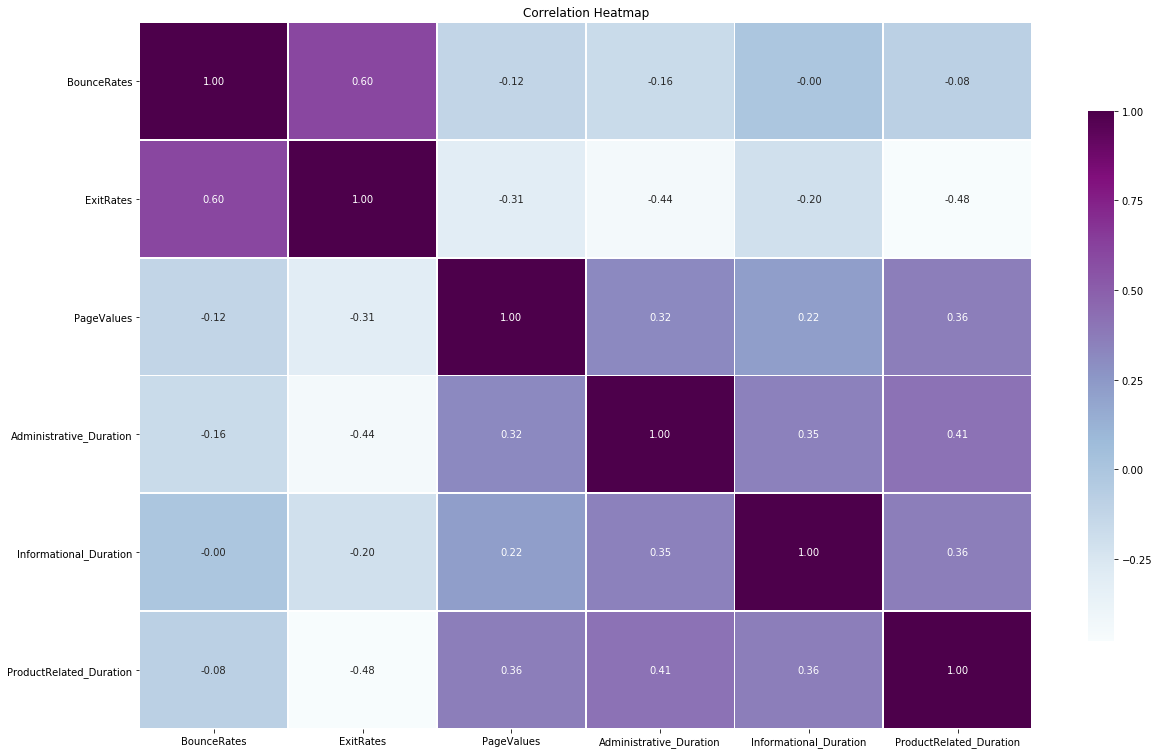

In [27]:
#Created a heatmap to see the correlation between the different variables
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data[col_names2].corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')
plt.savefig('corr_raw.png')

## Correlation Categorical (Chi-square) <a name="p10"></a>
Back to [Table of Contents](#tablecontents)
- For categorical
- Test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.
- **Make sure your data is label encoded (we already did that above)**
- Source code: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

In [28]:
from sklearn.feature_selection import chi2

# features
X = data[['Administrative', 'Informational', 'SpecialDay','OperatingSystems', 'Browser', 'Region',
             'TrafficType','monthBin', 'WeekendBin', 'VisitorTypeBin']]
# target
y = data['Y']

# chi-square test
chi_scores = chi2(X,y)

# here first array represents chi square values and second array represnts p-values
chi_scores

(array([1.13396553e+03, 3.57981605e+02, 5.37970945e+01, 1.03713226e+00,
        8.87329135e+00, 3.03756529e+00, 1.28319432e+00, 3.00903189e+02,
        8.12046425e+00, 1.47632793e+01]),
 array([1.37016070e-248, 7.74616955e-080, 2.22301227e-013, 3.08489372e-001,
        2.89372951e-003, 8.13578563e-002, 2.57305949e-001, 2.09410257e-067,
        4.37683493e-003, 1.21886081e-004]))

# Add Chi-square graph

In [29]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

Since Operating system, traffic type, and region has higher the p-value, it says that this variables is independent of the responce and it may not be viable for model training. Of course we will first preprocess data and check again if there is a difference. 

Note: 
- Chi-Square is sensitive to small frequencies in cells of tables. Generally, when the expected value in a cell of a table is less than 5, chi-square can lead to errors in conclusions.
- Results may vary on large samples/data

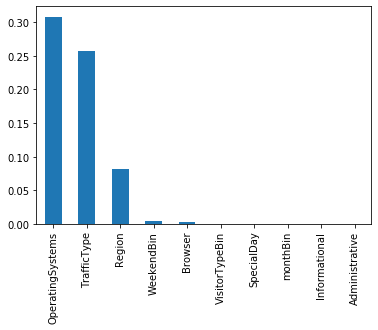

In [30]:
p_values.plot.bar()

# Clustering <a name="p11"></a>
Back to [Table of Contents](#tablecontents)

- want so see how accurate we can cluster/segment features that had significant negative and positive relationship 
- helper code: https://github.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/blob/master/online-shopper-s-intention.ipynb

### 1. Admnisitrative Duration vs Bounce Rates
- determine optimal k (centroids) using the Elbow Method

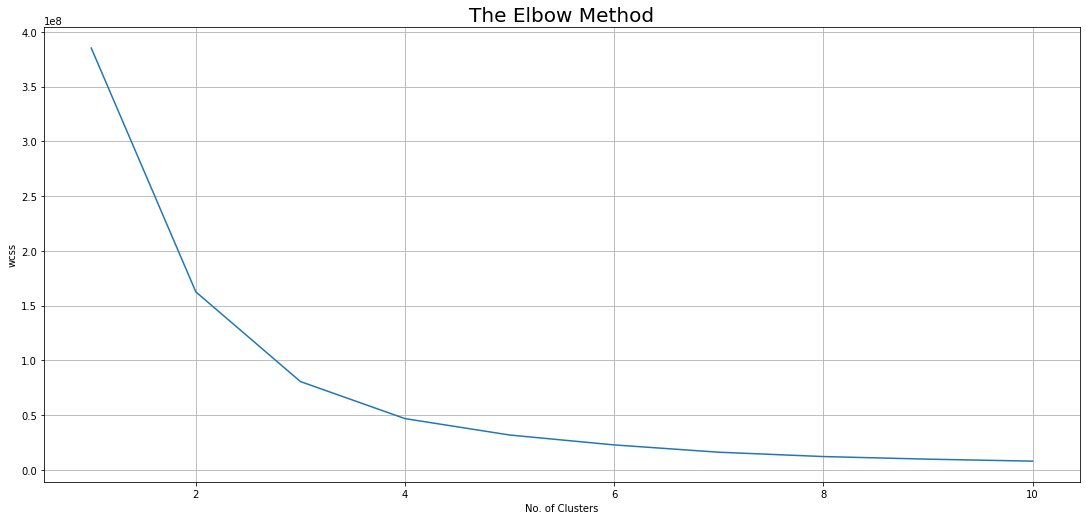

In [47]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape

from sklearn.cluster import KMeans # import kmeans module

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 123,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three. Let's go to the next step, i.e., Plotting the Clusters.

### Visualizing the Cluster using Scatter Plot

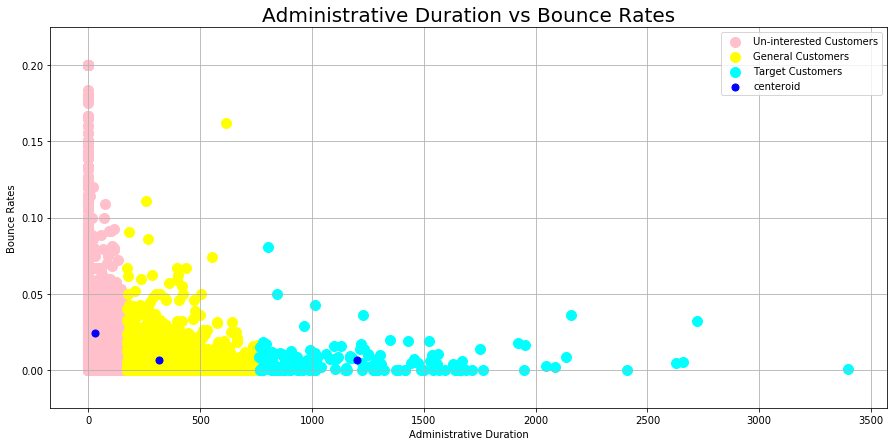

In [82]:
y_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123).fit_predict(x)
#y_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123).fit(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [84]:
# can I say now if Duration? in that distance than thats 0,1, 2
d = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123).fit_transform(x)
d

array([[  30.01036644,  314.33631922, 1199.56674773],
       [  30.0098644 ,  314.33626003, 1199.56673221],
       [  30.01036644,  314.33631922, 1199.56674773],
       ...,
       [  30.0099116 ,  314.33626923, 1199.56673463],
       [  44.9901525 ,  239.33626006, 1124.56673221],
       [  30.0098644 ,  314.33626003, 1199.56673221]])

- By, Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.
- There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a website

## 2. Informative Duration vs Bounce Rates
- same thing using the Elbow method

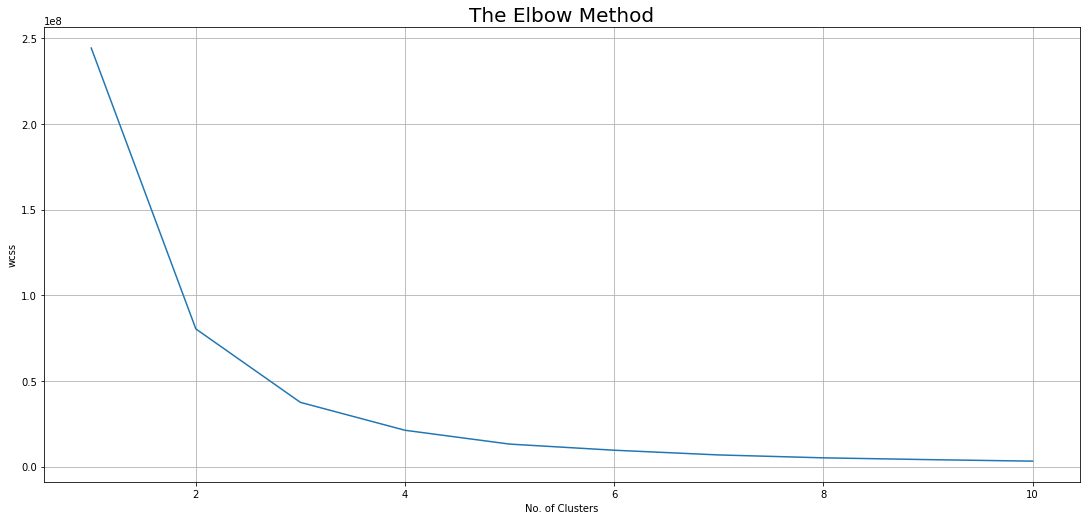

In [34]:
# informational duration vs Bounce Rates
x = data.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

According to this plot, the maximum bend is at second index, that is the number of Optimal no. of Clusters for Informational Duration and Revenue is two.

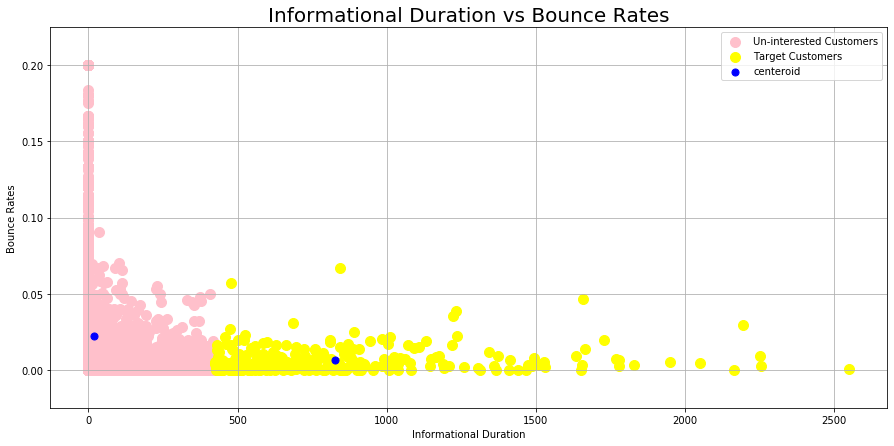

In [35]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

- We see the same pattern here users who spend more time on the information page are less likely to bounce to another page (yellow group)
- Pink group has the highest chance to navigate away from the website and spends less time on it 

## 3. Administrative Duration and Exit Rates
- same thing using the elbow method
- want to see page duration segmentation accuracy compared to exit rates 

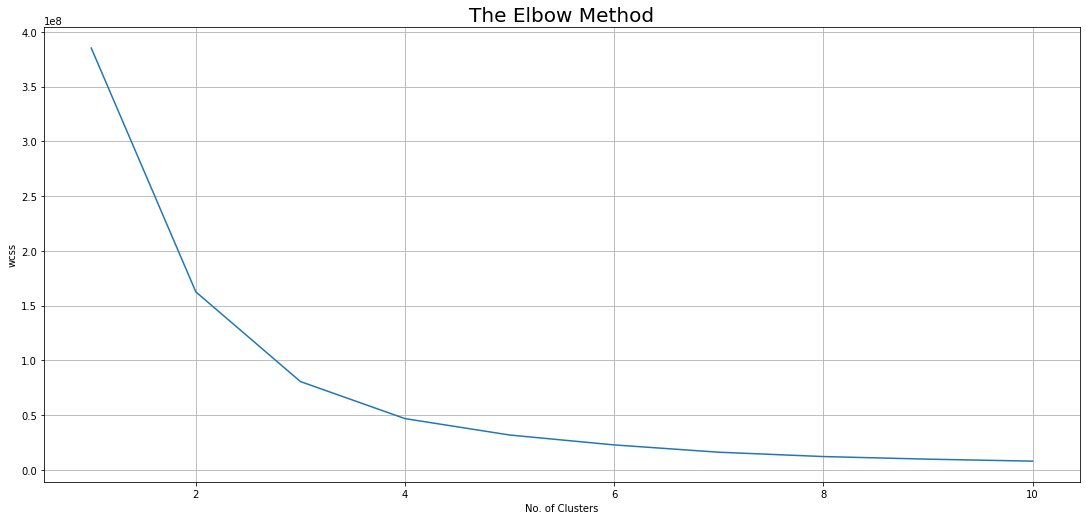

In [36]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 123, # repruducability
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

- Best performance at 2 clusters 

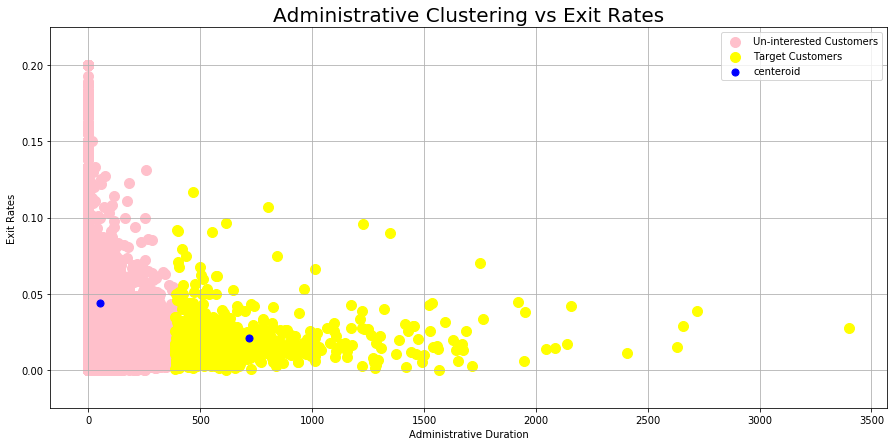

In [37]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

- Similar pattern users have lower exit rates if they spend more time on the page (yellow group)

## 4. Product Related Duration vs Page Values

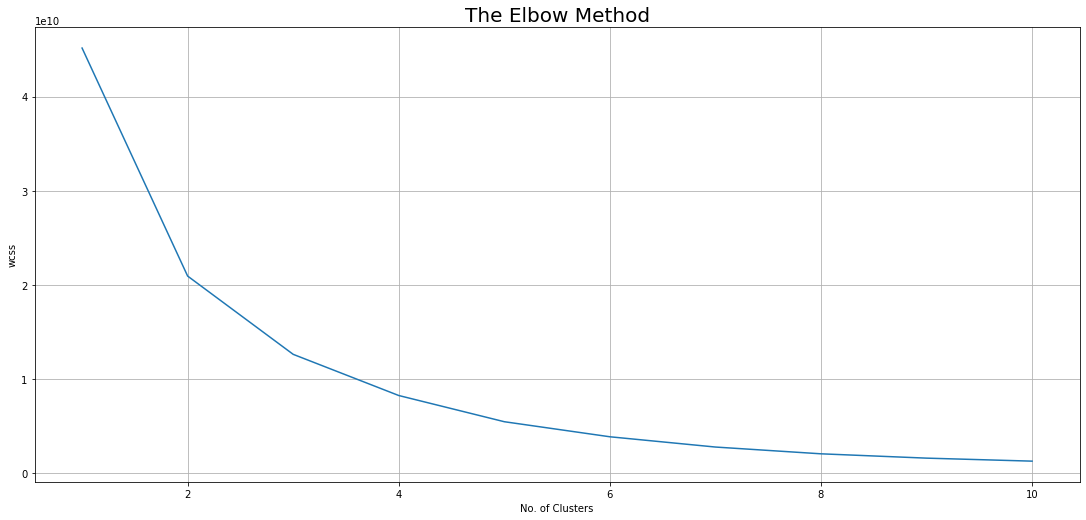

In [38]:
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [5,8]].values

# checking the shape of the dataset
x.shape

from sklearn.cluster import KMeans # import kmeans module

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 123,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

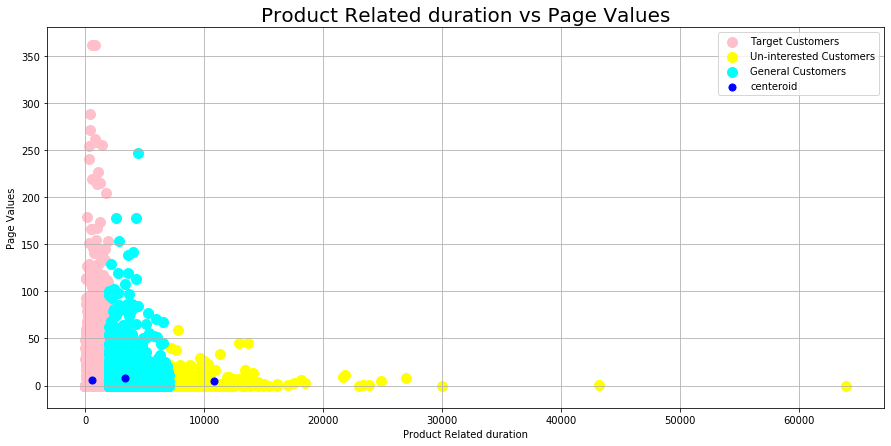

In [39]:
'''
Page Value is the average value for a page that a user visited before landing on the goal page or completing an 
Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more 
to your site's revenue.
'''

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Un-interested Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Product Related duration vs Page Values', fontsize = 20)
plt.grid()
plt.xlabel('Product Related duration')
plt.ylabel('Page Values')
plt.legend()
plt.show()

- Customers that spend less time on product related page and have higher page value are more likely to make a purchase 

## 5. Page Values and Exit Rates

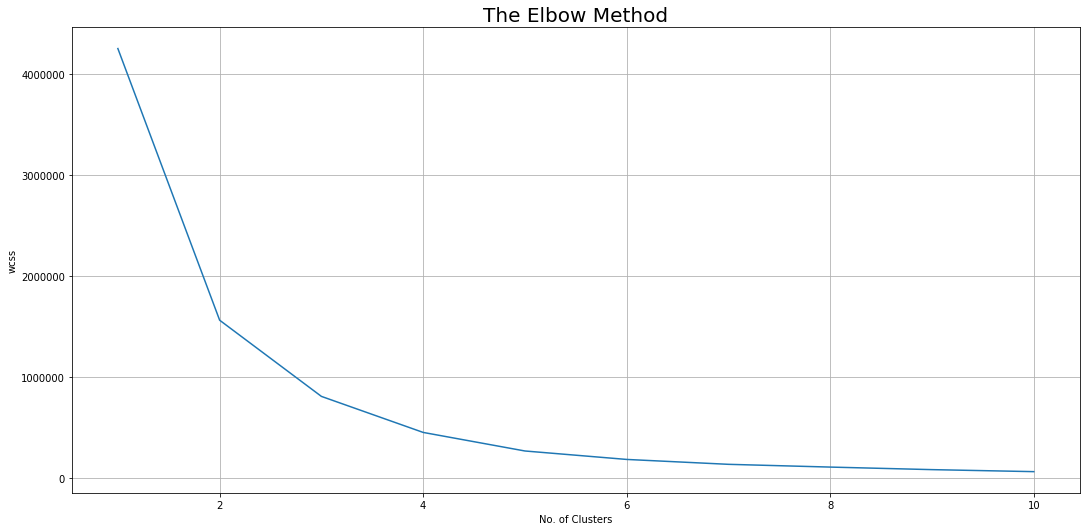

In [22]:
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [7,8]].values

# checking the shape of the dataset
x.shape

from sklearn.cluster import KMeans # import kmeans module

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 123,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

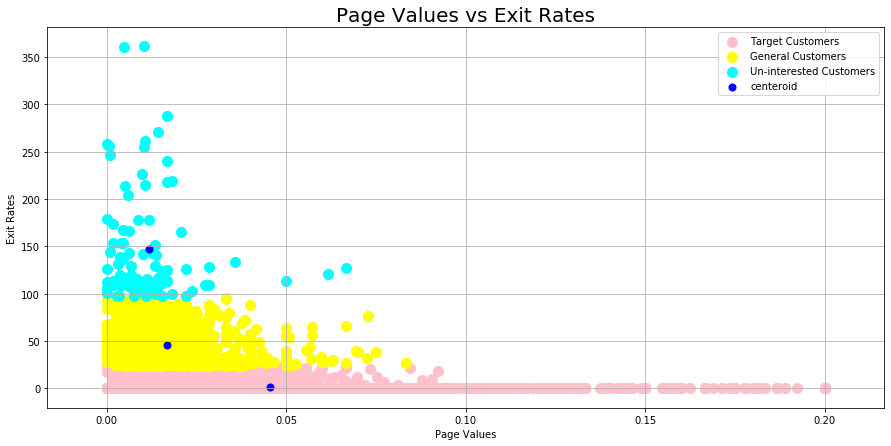

In [24]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Un-interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Page Values vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Page Values')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

- customers that have higher page value and lower exit rate tend to purchase more

## 6. Bounce and Exit Rates

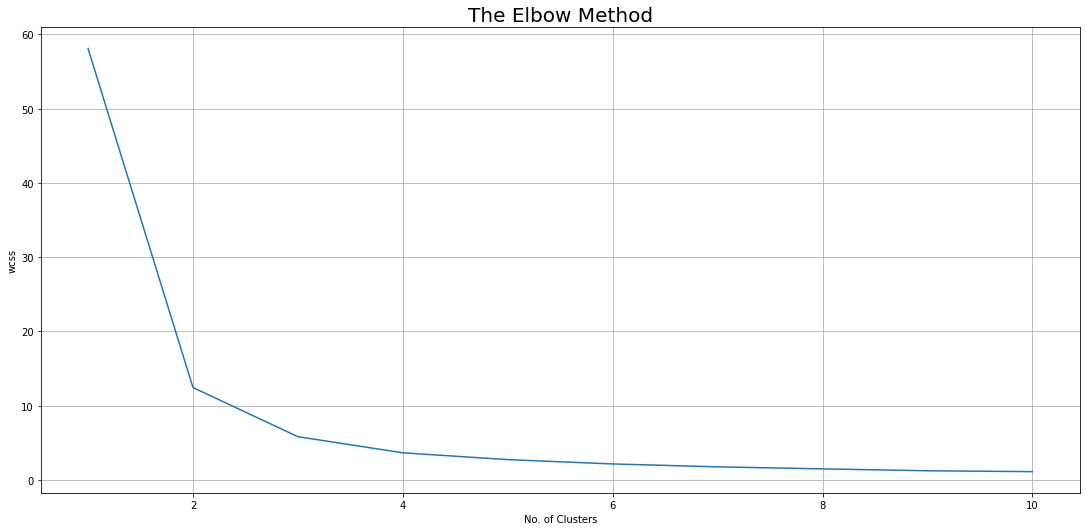

In [5]:
'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [6,7]].values

# checking the shape of the dataset
x.shape

from sklearn.cluster import KMeans # import kmeans module

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 123,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

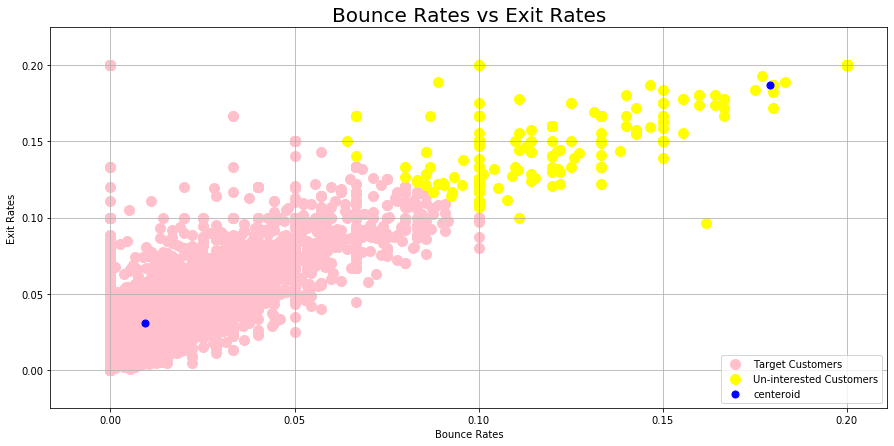

In [9]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Un-interested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

# Summary <a name="p12"></a>
Back to [Table of Contents](#tablecontents)
- ProductRelated page has lots of outliers we need to take care of (of course other have too)
- Exit rates have 0 values we need to impute 
- Exit rates and Page values seem like the most important features
- We need to convert counts to ratios (confirm all the count and data type variables with professor)
- Make sure we balance target variable before modeling (up-sample gave us best results)
- Higher the page value and the lower are other values (bounce rate, exit rate, product related duration), more likely the customer will purchase